In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Dropout
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

from mlxtend.plotting import plot_decision_regions

In [2]:
## Generate Dataset

x,y = make_moons(n_samples=100, noise = 0.25,random_state=2)

In [3]:
x

array([[ 1.04051282e+00, -2.33491352e-02],
       [-5.54741398e-01,  1.27013832e+00],
       [-7.23715066e-02, -1.77901205e-01],
       [-4.71961272e-02,  1.21883595e+00],
       [ 9.13794475e-01,  8.59883240e-01],
       [ 5.41150127e-01,  6.95140255e-01],
       [ 7.03026094e-01, -2.57985072e-01],
       [-1.33401091e-01,  1.06959481e+00],
       [-1.14287718e-01,  8.97688273e-01],
       [ 1.01150903e+00,  8.49916582e-01],
       [ 2.12537198e+00,  5.08605794e-01],
       [ 1.70010780e+00,  7.16265767e-01],
       [ 1.55439712e+00, -8.60585592e-01],
       [ 5.55027808e-01,  5.76836247e-01],
       [ 1.15481964e+00, -1.43219905e-01],
       [ 2.86145607e-01,  1.32282616e+00],
       [ 4.89545211e-01,  2.91536879e-01],
       [-6.67796665e-01,  7.81730273e-01],
       [ 2.23453555e-01,  3.34602767e-02],
       [ 1.18698241e+00, -3.39029325e-01],
       [-6.08507947e-01,  4.54265298e-01],
       [ 8.29543872e-01,  7.39089646e-01],
       [ 1.13299058e+00, -2.62270185e-01],
       [-1.

In [4]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

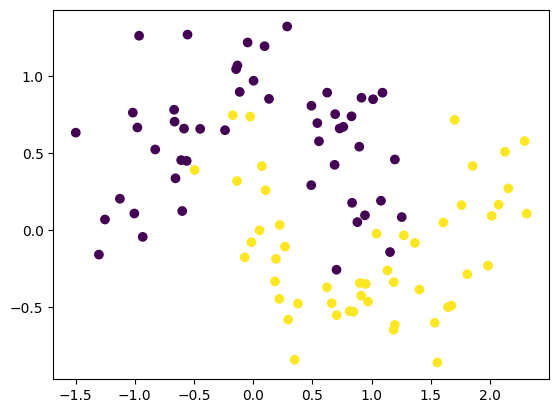

In [5]:
## Visualization

plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
## Building Model without Regularization

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
## Training the Model

adam = Adam(learning_rate = 0.01)

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history1 = model.fit(x,y, epochs =2000 , validation_split = 0.2, verbose=0)

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

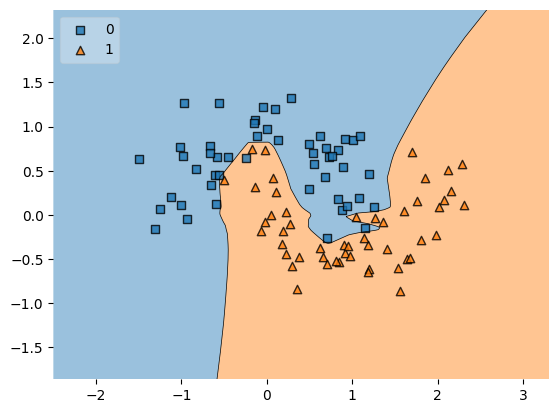

In [8]:
## Plotting the Decision Boundary

plot_decision_regions(x, y.astype('int'), clf = model, legend=2)

In [9]:
## Clearly a case of overfitting

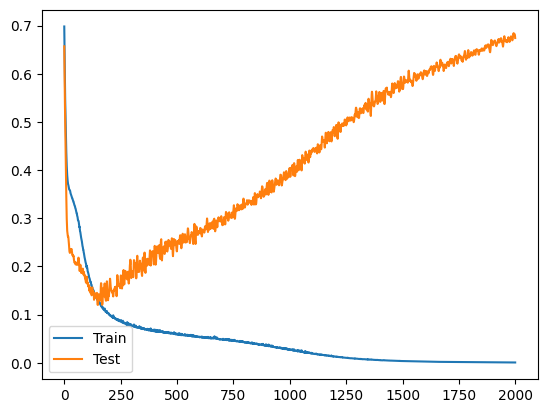

In [10]:
## Plotting Loss

plt.plot(history1.history['loss'], label = 'Train')
plt.plot(history1.history['val_loss'], label = 'Test')
plt.legend()
plt.show()

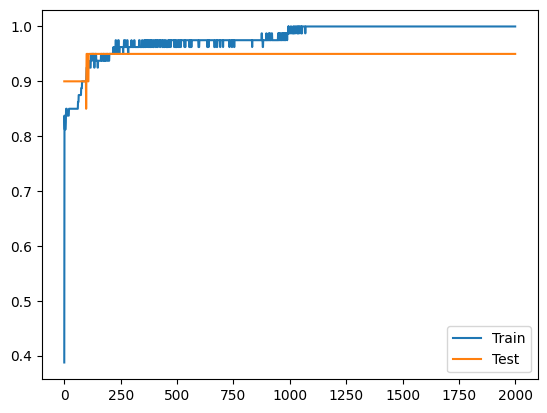

In [11]:
## Plotting Accuracy

plt.plot(history1.history['accuracy'], label = 'Train')
plt.plot(history1.history['val_accuracy'], label = 'Test')
plt.legend()
plt.show()

In [12]:
## Clearly both plot shows the case of overfittting

## Building ANN Using Regulatrization

In [13]:
## Regularizer can be imported from keras.regularizer library

from keras.regularizers import l1,l2

model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=l2(0.03)))
model1.add(Dense(128, activation='relu',kernel_regularizer=l2(0.03)))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
## Training the Model

adam = Adam(learning_rate = 0.01)

model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history2 = model1.fit(x,y, epochs =2000 , validation_split = 0.2, verbose=0)

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

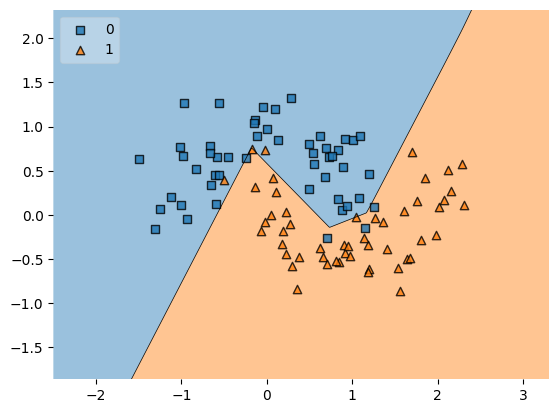

In [15]:
## Plotting the Decision Boundary

plot_decision_regions(x, y.astype('int'), clf = model1, legend=2)

In [16]:
## This is giving much better result as compare to the last plot

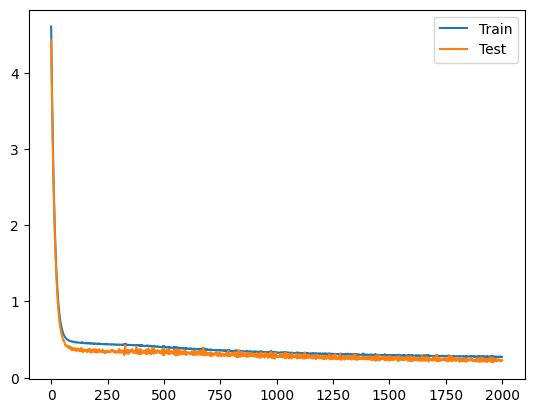

In [17]:
## Plotting Loss

plt.plot(history2.history['loss'], label = 'Train')
plt.plot(history2.history['val_loss'], label = 'Test')
plt.legend()
plt.show()

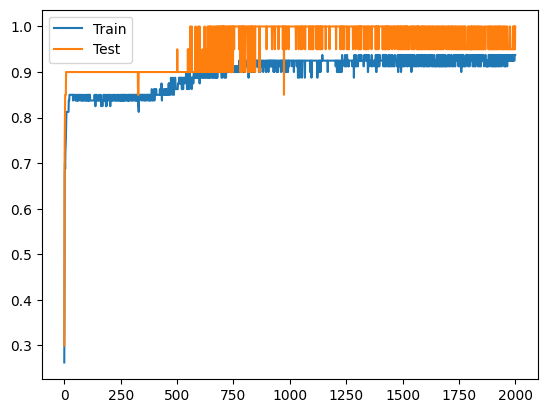

In [18]:
## Plotting Accuracy

plt.plot(history2.history['accuracy'], label = 'Train')
plt.plot(history2.history['val_accuracy'], label = 'Test')
plt.legend()
plt.show()

In [19]:
## The Gap has been reduced drastically hence model is givng better result post regularization

## Checking the Weight Differeces between Models


In [29]:
## Model 1 layer 1 weights shape

model.get_weights()[0].shape

(2, 128)

As we have 2 inputs and 128 nodes in first hidden layer

In [31]:
# Flattening for Model 1 and Model 2

m1 = model.get_weights()[0].reshape(256)
m2 = model1.get_weights()[0].reshape(256)

<Axes: >

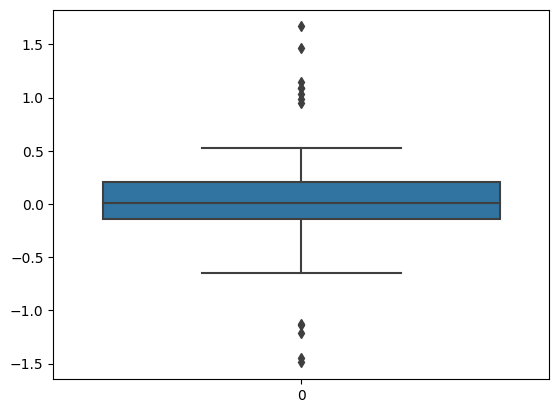

In [34]:
## Ploting Boxplot

sns.boxplot(m1)

<Axes: >

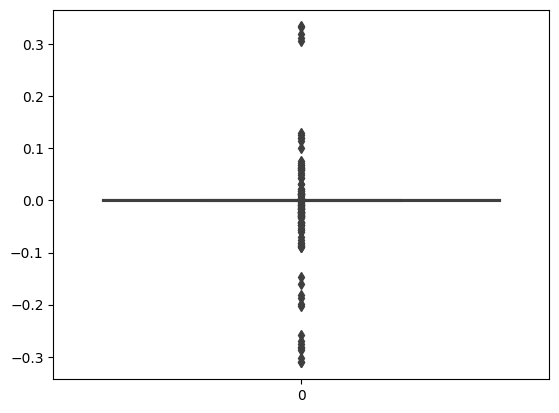

In [35]:
sns.boxplot(m2)

In [36]:
## We can see the range has reduced


In [37]:
m1.max()>m2.max() ## Max Weight of Model 2 moving towards 0

True

In [38]:
m1.min()<m2.min() ## Minimum Weight of Model 2 moving towards 0

True

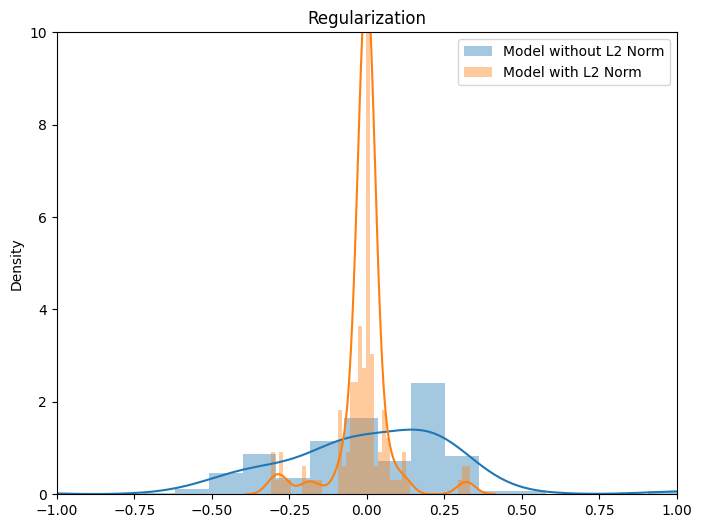

In [49]:
## Checking distplot

plt.figure(figsize=(8,6))
sns.distplot(m1 , label = 'Model without L2 Norm')
sns.distplot(m2 , label = 'Model with L2 Norm')
plt.xlim(-1,1)
plt.ylim(0,10)
plt.legend()
plt.title('Regularization')
plt.show()

In [50]:
## As we can observe the Regularized Model Reduced the Model Weight compare the Unregularized Model

In [51]:
## Similarly we can try fro L1 Norm